# Exercise 1.5 - Artificial Neural Network

This script contains all code relating to building the ANN Model for the Climate Wins Data as well as its evaluation:

1. Importing Libraries and Data
2. Data Manipulation for Model
3. ANN & Evaluation

## 1. importing Libraries and Data

In [1]:
# Import Libraries and Functions
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Create a path for data import

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 1 - ClimateWins - Main\02 Data'

In [3]:
# Import Scaled Weather Data
climate = pd.read_csv(os.path.join(path, 'ClimateWins_Dataset_original.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Import Pleasant Weather Data
pleasant = pd.read_csv(os.path.join(path, 'Pleasant Weather Prediction Answers.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Manipulation for Model

Must first remove columns of unmatched weather stations

In [5]:
# Create list of columns for both dataframes:
climate_columns = climate.columns.to_list()
pleasant_columns = pleasant.columns.to_list()

In [6]:
# Obtain list of all weather stations names from pleasant weather:
pleasant_stations = [col.split('_')[0] for col in pleasant_columns if '_' in col]
pleasant_stations # Check

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [7]:
# Obtain column names from the climate_columns list where the stations are also in the pleasant_stations list
climate_stations = [col for col in climate_columns if col.split('_')[0] in pleasant_stations]
climate_stations # Check

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [8]:
# Subset Data from Climate DataFrame to only include the columns above that also relate to temp
filtered_columns = [col for col in climate_stations if col.split('_')[1].startswith('temp')]
climate_new = climate[filtered_columns]
climate_new.head() # Check

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,5.1,9.3,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,3.1,7.7,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,5.3,6.8,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,4.4,6.7,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,5.3,8.0,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4


In [9]:
# Create an 'X' matrix by dropping the unneeded columns.
X = climate_new
y = pleasant.drop(['DATE'], axis = 1)

# Check shape
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Check shape of training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [12]:
# Check the first 10 rows of X_train
X_train.head(10)

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,20.4,13.6,26.9,22.5,16.2,28.6,22.5,18.6,27.1,16.3,...,16.5,2.3,0.8,3.8,8.5,5.0,11.9,15.6,13.7,17.6
20472,-1.8,-3.2,-0.5,-3.6,-6.0,0.1,-3.3,-7.2,-0.2,-2.5,...,-8.2,-17.4,-19.2,-15.6,-6.9,-9.4,-4.6,10.7,7.9,13.5
18269,-1.8,-6.0,0.7,3.2,1.6,6.7,-0.4,-1.3,1.0,-4.9,...,-11.7,-14.1,-15.5,-12.7,-8.3,-13.3,-5.5,1.0,-3.9,5.9
7713,-1.4,-3.8,2.1,0.7,0.3,2.5,1.5,-0.2,4.0,0.2,...,-2.9,-20.9,-22.4,-19.4,-2.2,-5.2,-1.5,6.8,5.5,9.6
21958,6.1,1.8,13.5,6.7,1.7,11.7,6.2,2.6,10.8,5.7,...,5.3,-14.7,-16.6,-12.7,1.0,-0.6,3.5,10.7,7.9,13.5
11464,18.3,10.6,24.1,18.7,14.7,24.0,18.7,14.5,22.0,12.1,...,16.3,-2.6,-3.9,-1.3,10.0,7.7,15.6,13.1,9.0,16.9
3984,3.7,-0.5,6.3,4.4,3.4,5.0,4.7,4.3,5.4,5.2,...,-0.2,-2.6,-4.1,-1.0,1.1,0.0,2.6,10.9,9.3,12.5
4752,-3.9,-7.4,-1.6,0.5,0.0,1.7,2.1,1.3,2.8,2.3,...,3.5,-10.3,-12.3,-8.2,1.3,-1.2,3.0,10.5,9.7,11.4
11092,15.7,11.2,22.4,21.3,14.1,26.9,20.6,15.7,25.7,13.5,...,19.3,-0.7,-2.2,0.8,11.9,8.6,15.8,12.6,9.5,15.8
21377,18.8,9.9,26.0,23.6,20.1,27.2,21.6,16.9,27.2,19.0,...,29.3,4.4,-0.7,9.5,20.0,14.2,26.4,10.7,7.9,13.5


Investigating these top 10 rows of the X_train dataframe shows that scaling will be necessary to optimise the accuracy of the ANN model. Whilst the measurements are all in the same unit, the model will likely perform better and train easier with the data being standardised. After all, there is a broad range of values between and within certain weather stations.

In [13]:
# Scaling the data
scaler = StandardScaler()

# Fit the train data
scaler.fit(X_train)

# Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


Note the features all have a mean of zero and a standard deviation of one.

In [14]:
# Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

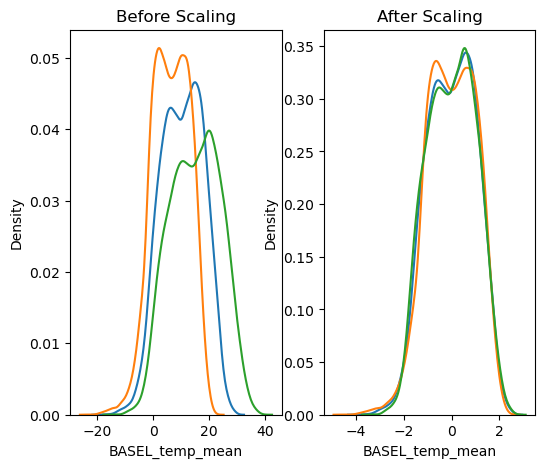

In [15]:
# Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_min'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_max'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_min'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_max'], ax=ax2)

plt.show()

As shown with just the weather station from Basel, scaling has helped standardise the data and aids the ANN Model to not over weight any measures.

## 3. ANN & Evaluation

### 3.1 - Scenario 1 (2 layers (10,5), 500 iterations)

In [16]:
# Create the ANN
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [17]:
y_pred = mlp1.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp1.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4656053915872647
0.475775531544092


In [18]:
# Code for Confusion Matrix
locations = list({x.split("_")[0] for x in climate_new.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

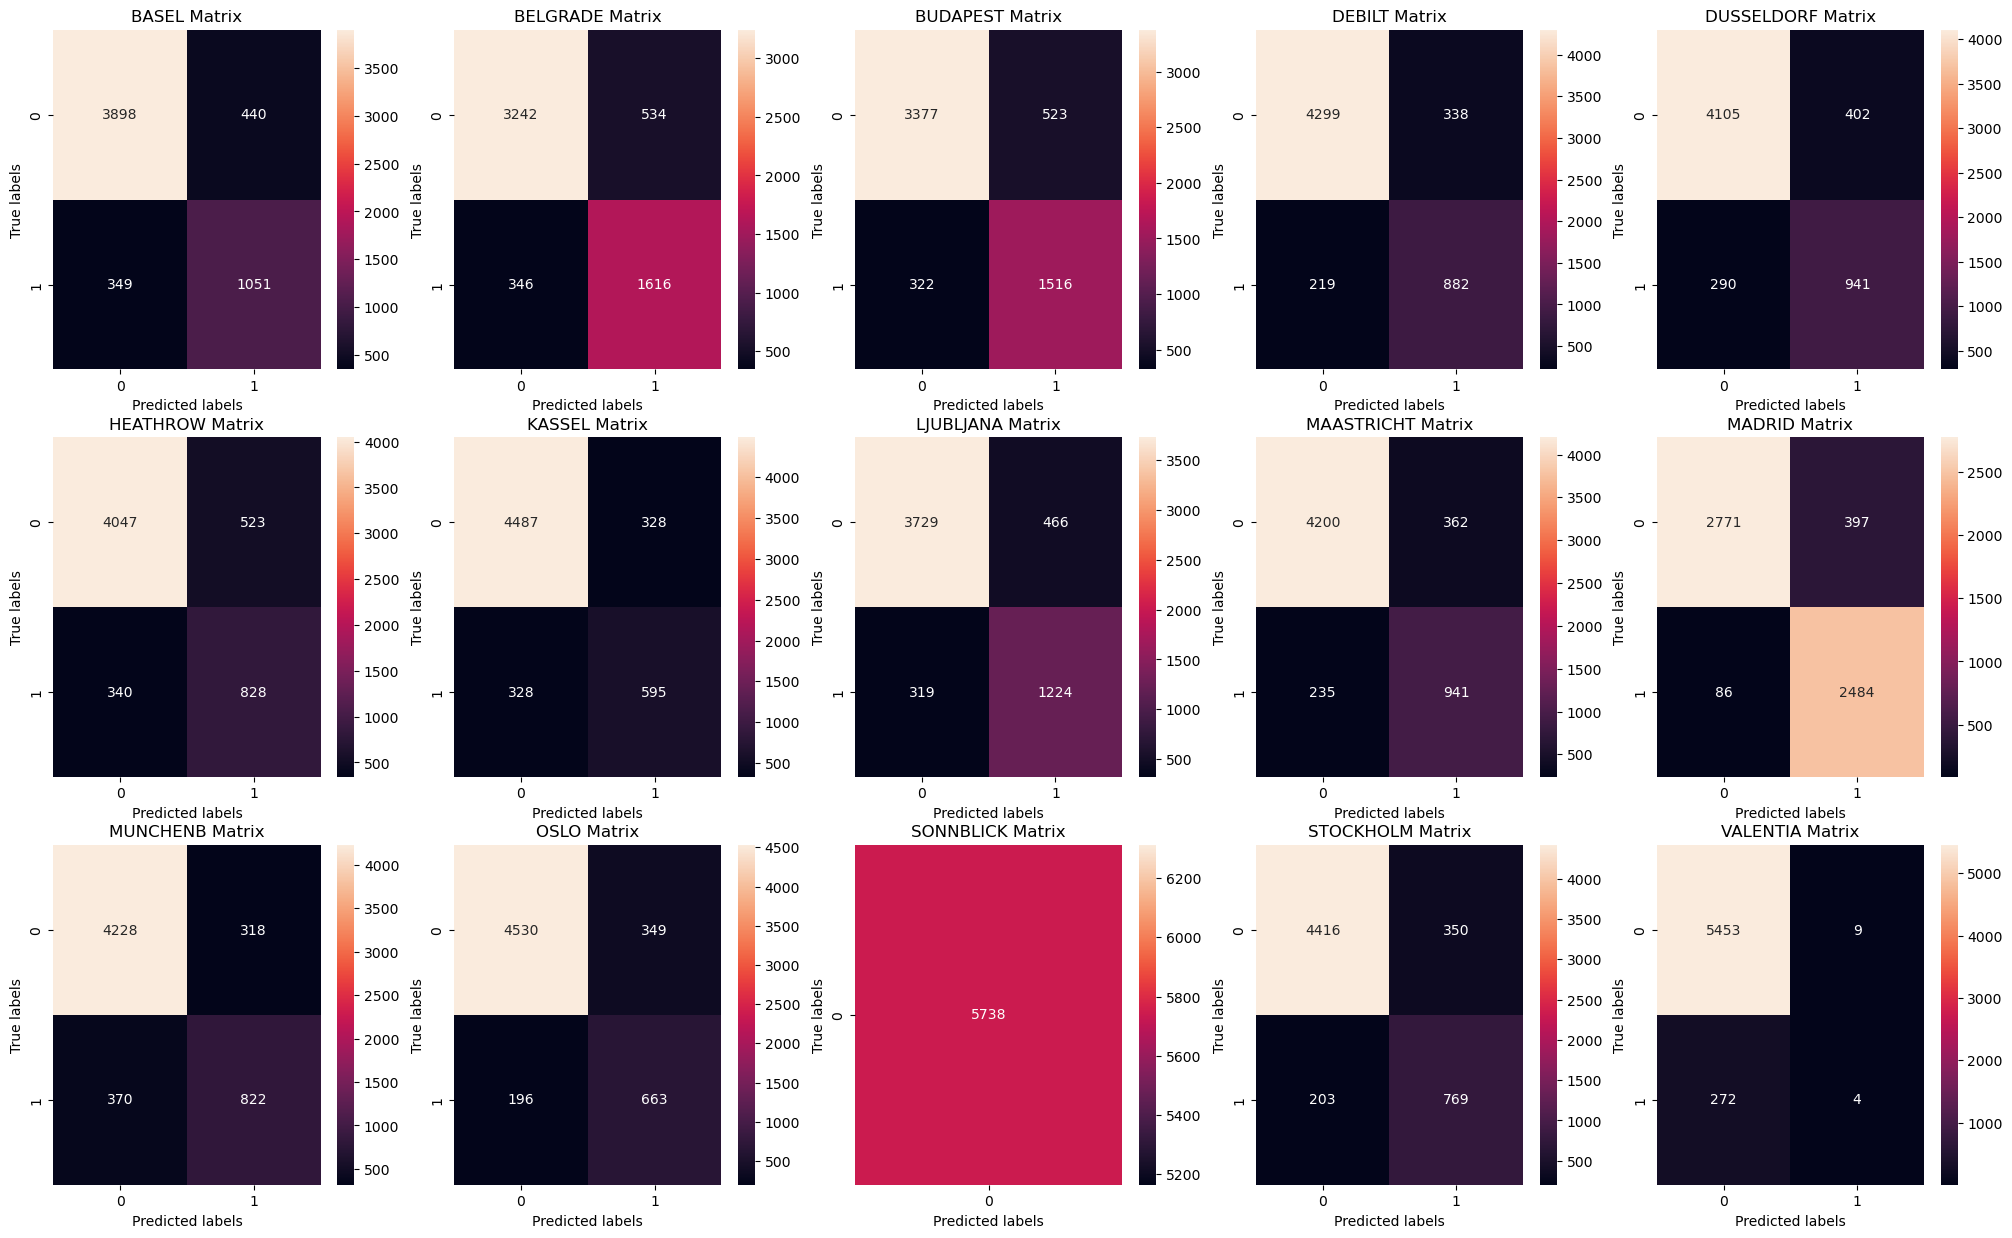

In [19]:
# Confusion Matrix for test data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

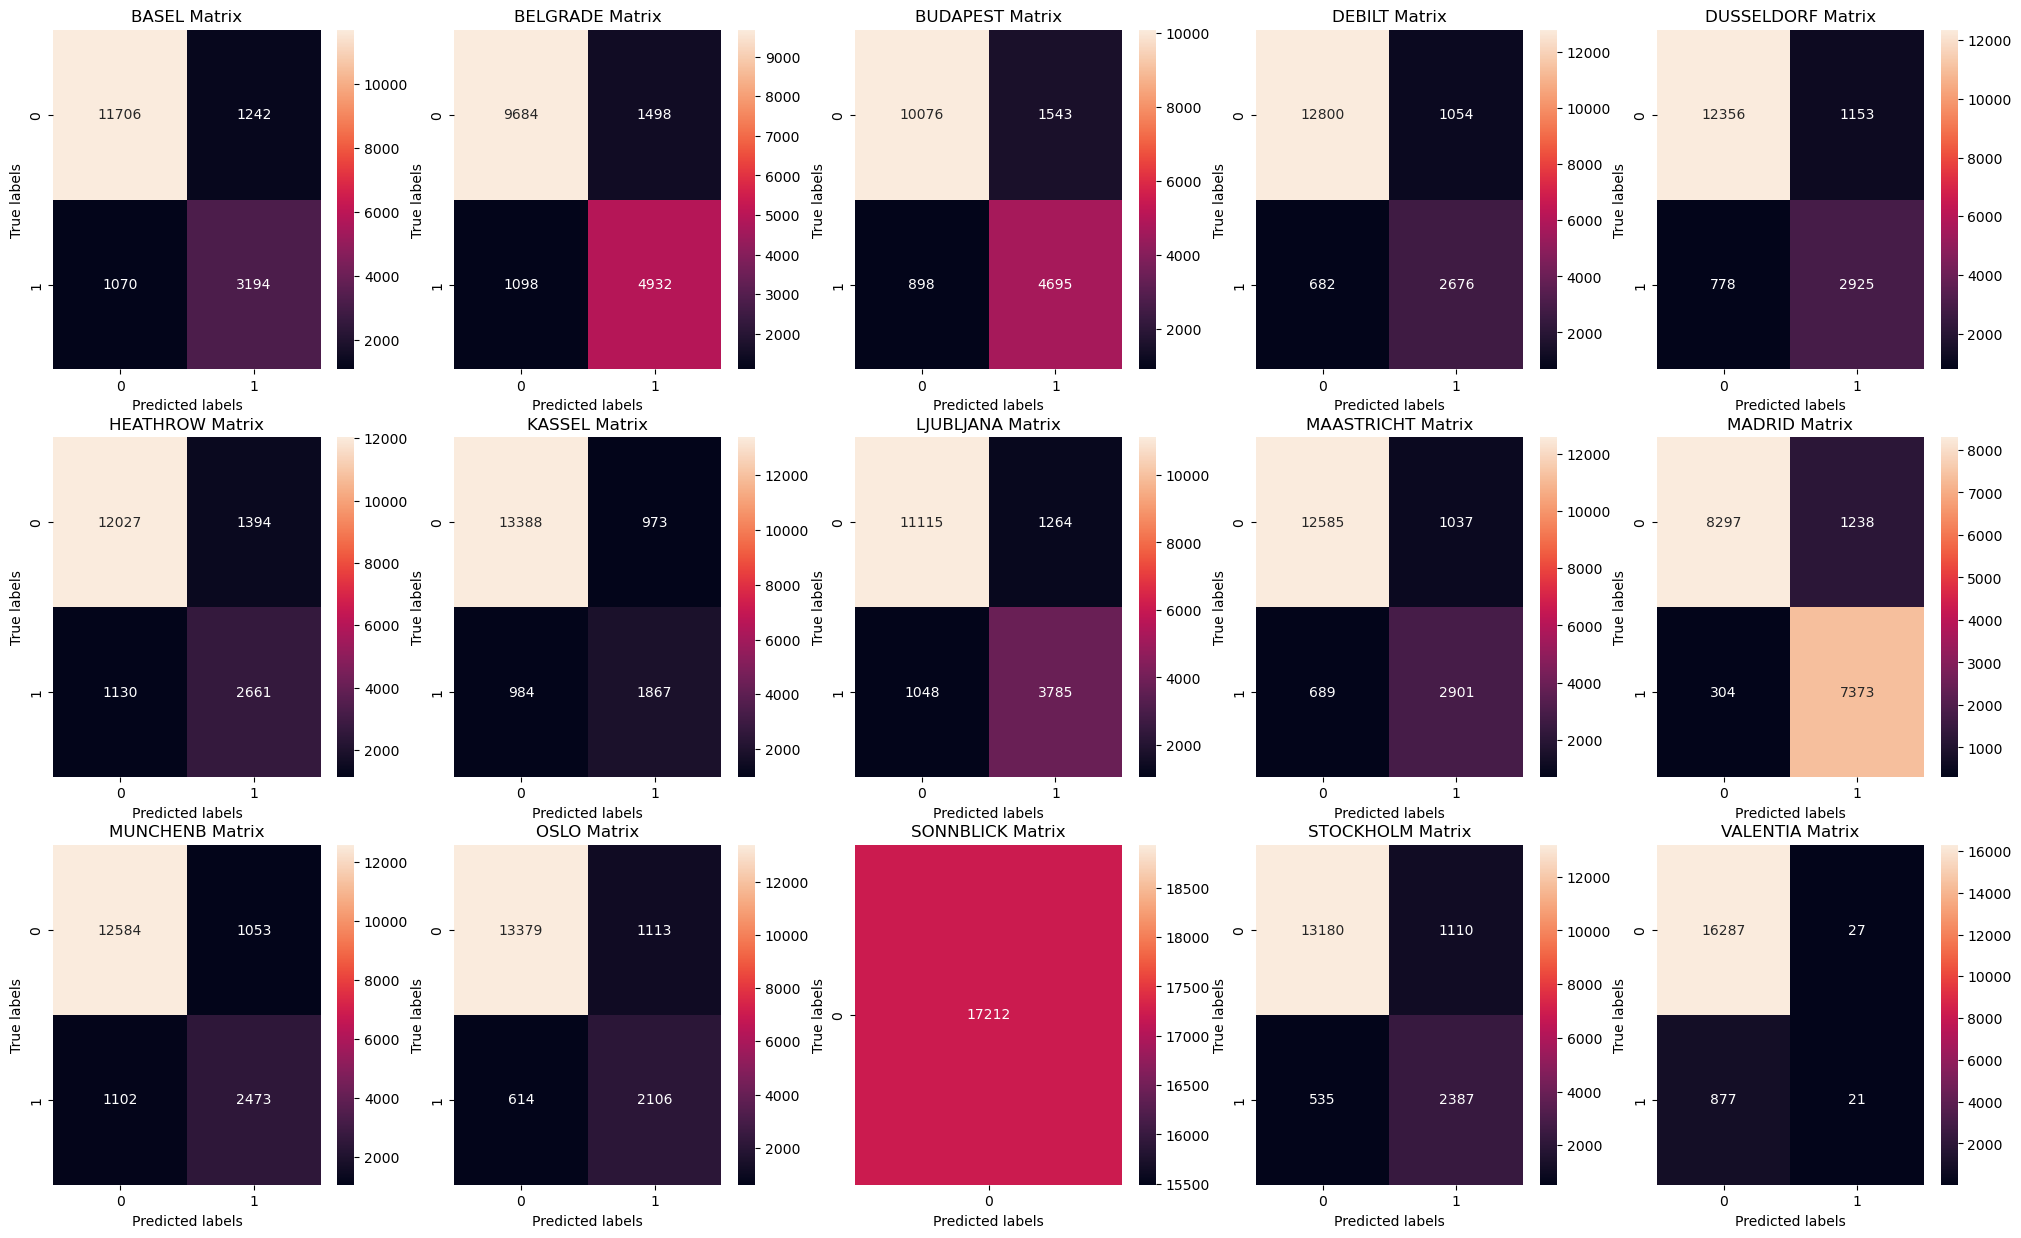

In [20]:
# Confusion Matrix for training data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 3.2 - Scenario 2 (3 layers (20, 10, 10), 1000 iterations)

In [21]:
# Create second ANN
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
# Fit the data to the model
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [22]:
y_pred = mlp2.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp2.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4714733906576807
0.4750784245381666


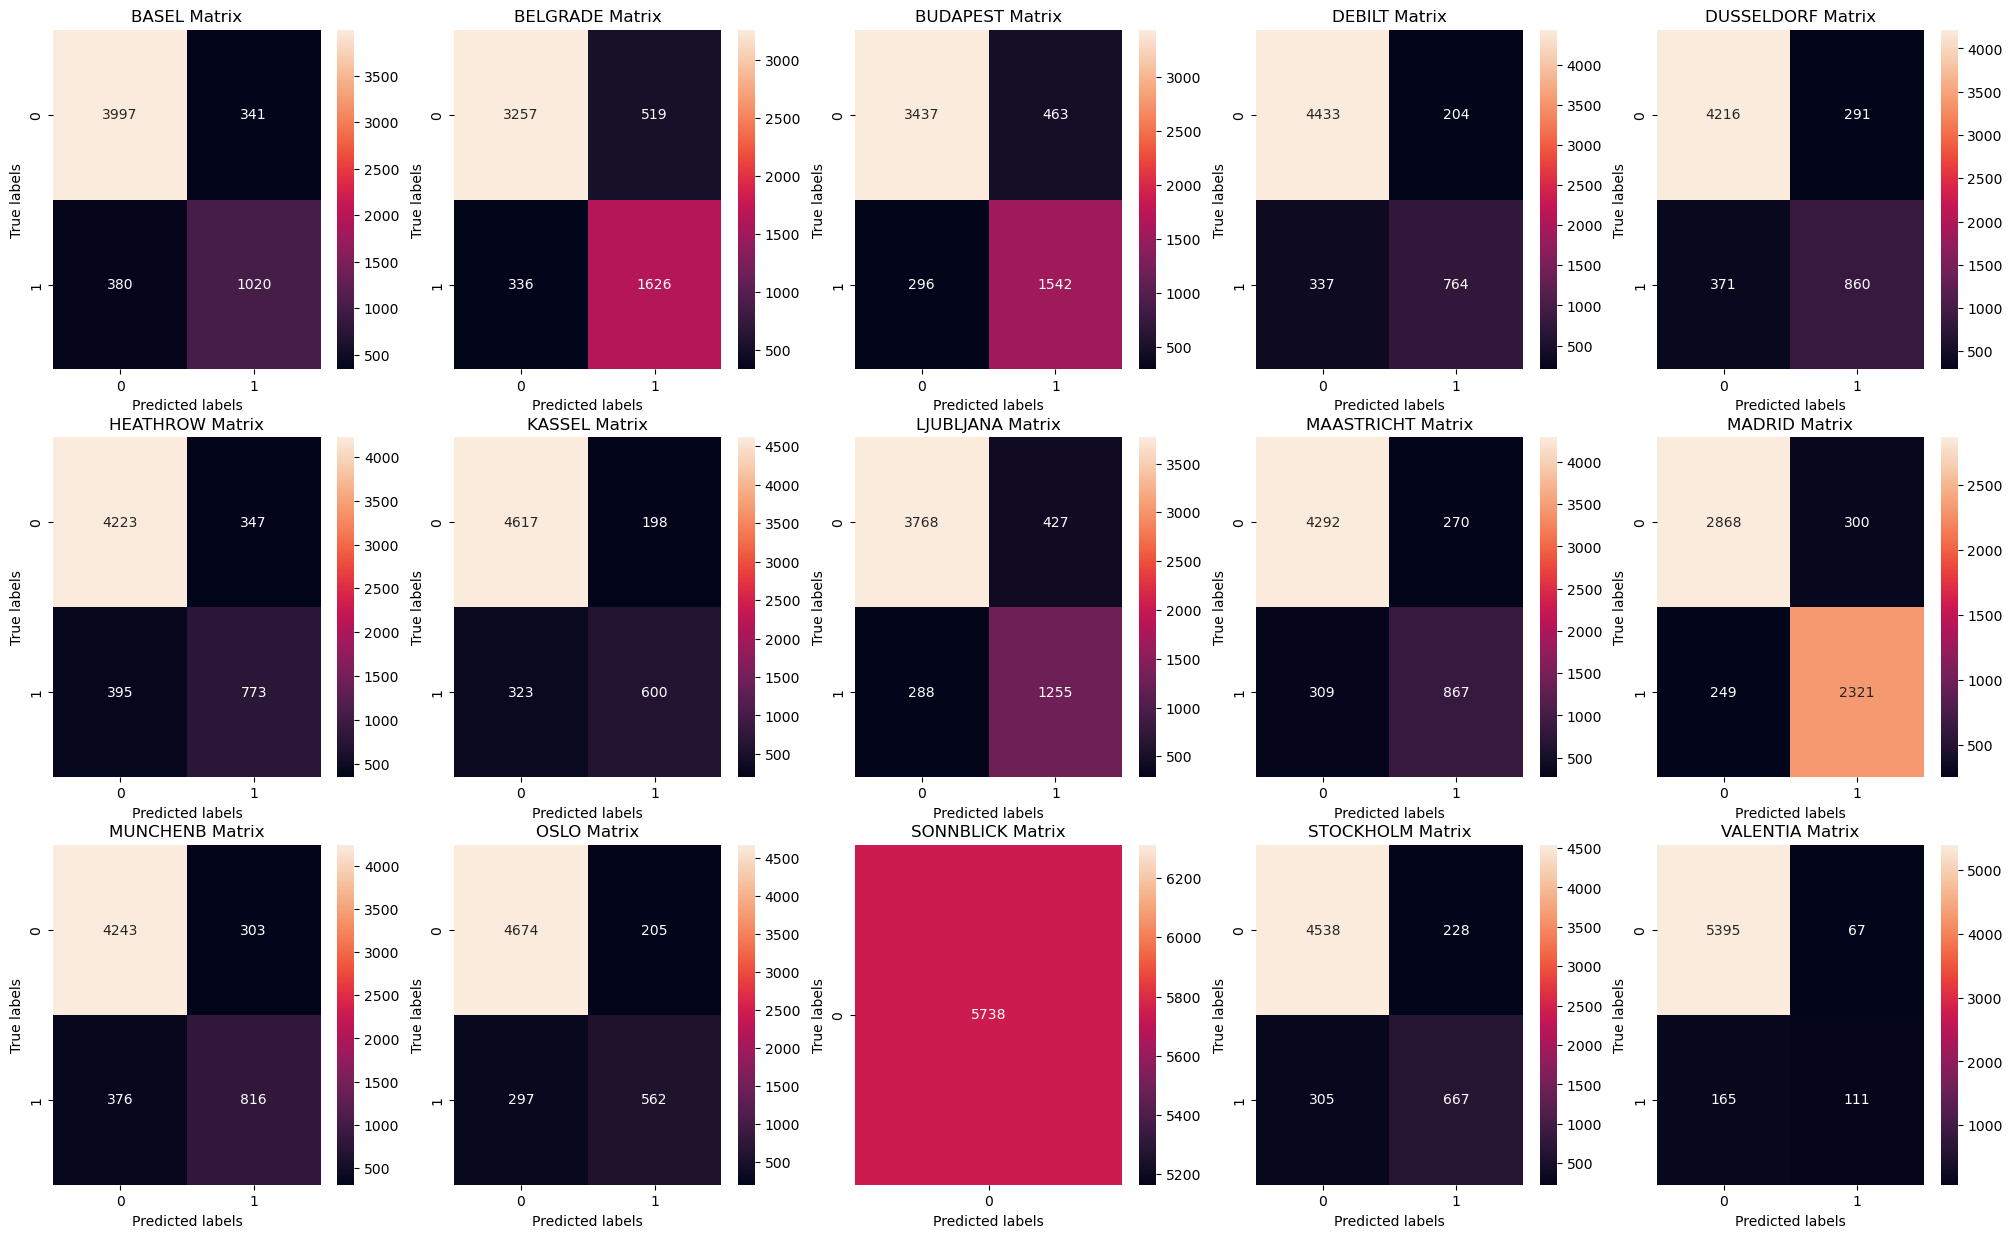

In [23]:
# Confusion Matrix for test data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

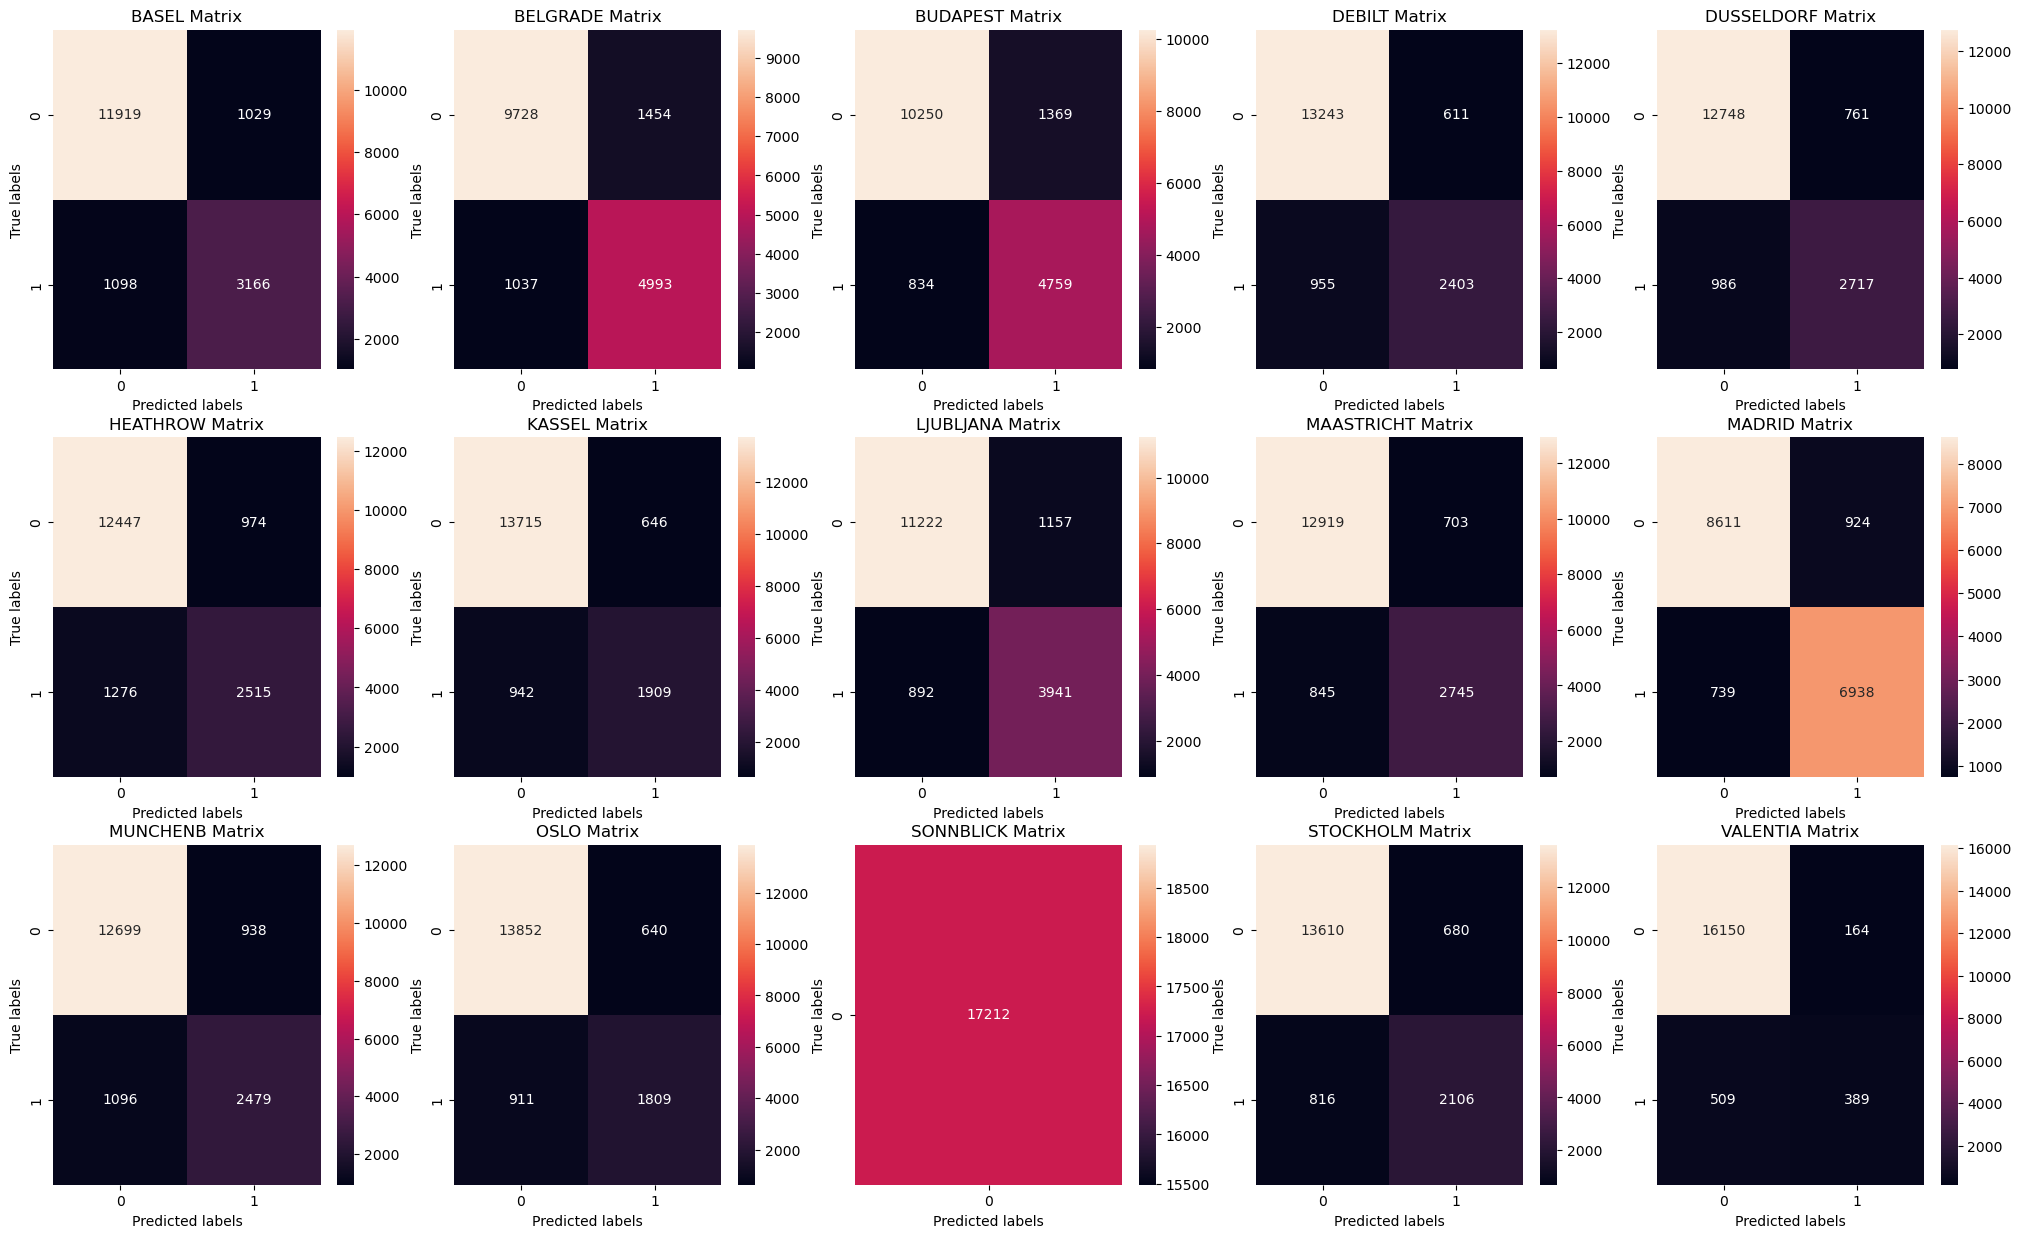

In [24]:
# Confusion Matrix for training data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 3.2 - Scenario 2 (3 layers (30, 15, 20), 2000 iterations)

In [25]:
# Create second ANN
mlp3 = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=2000, tol=0.00001)
# Fit the data to the model
mlp3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=2000, tol=1e-05)

In [26]:
y_pred = mlp3.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp3.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4951196839414362
0.49843150923666785


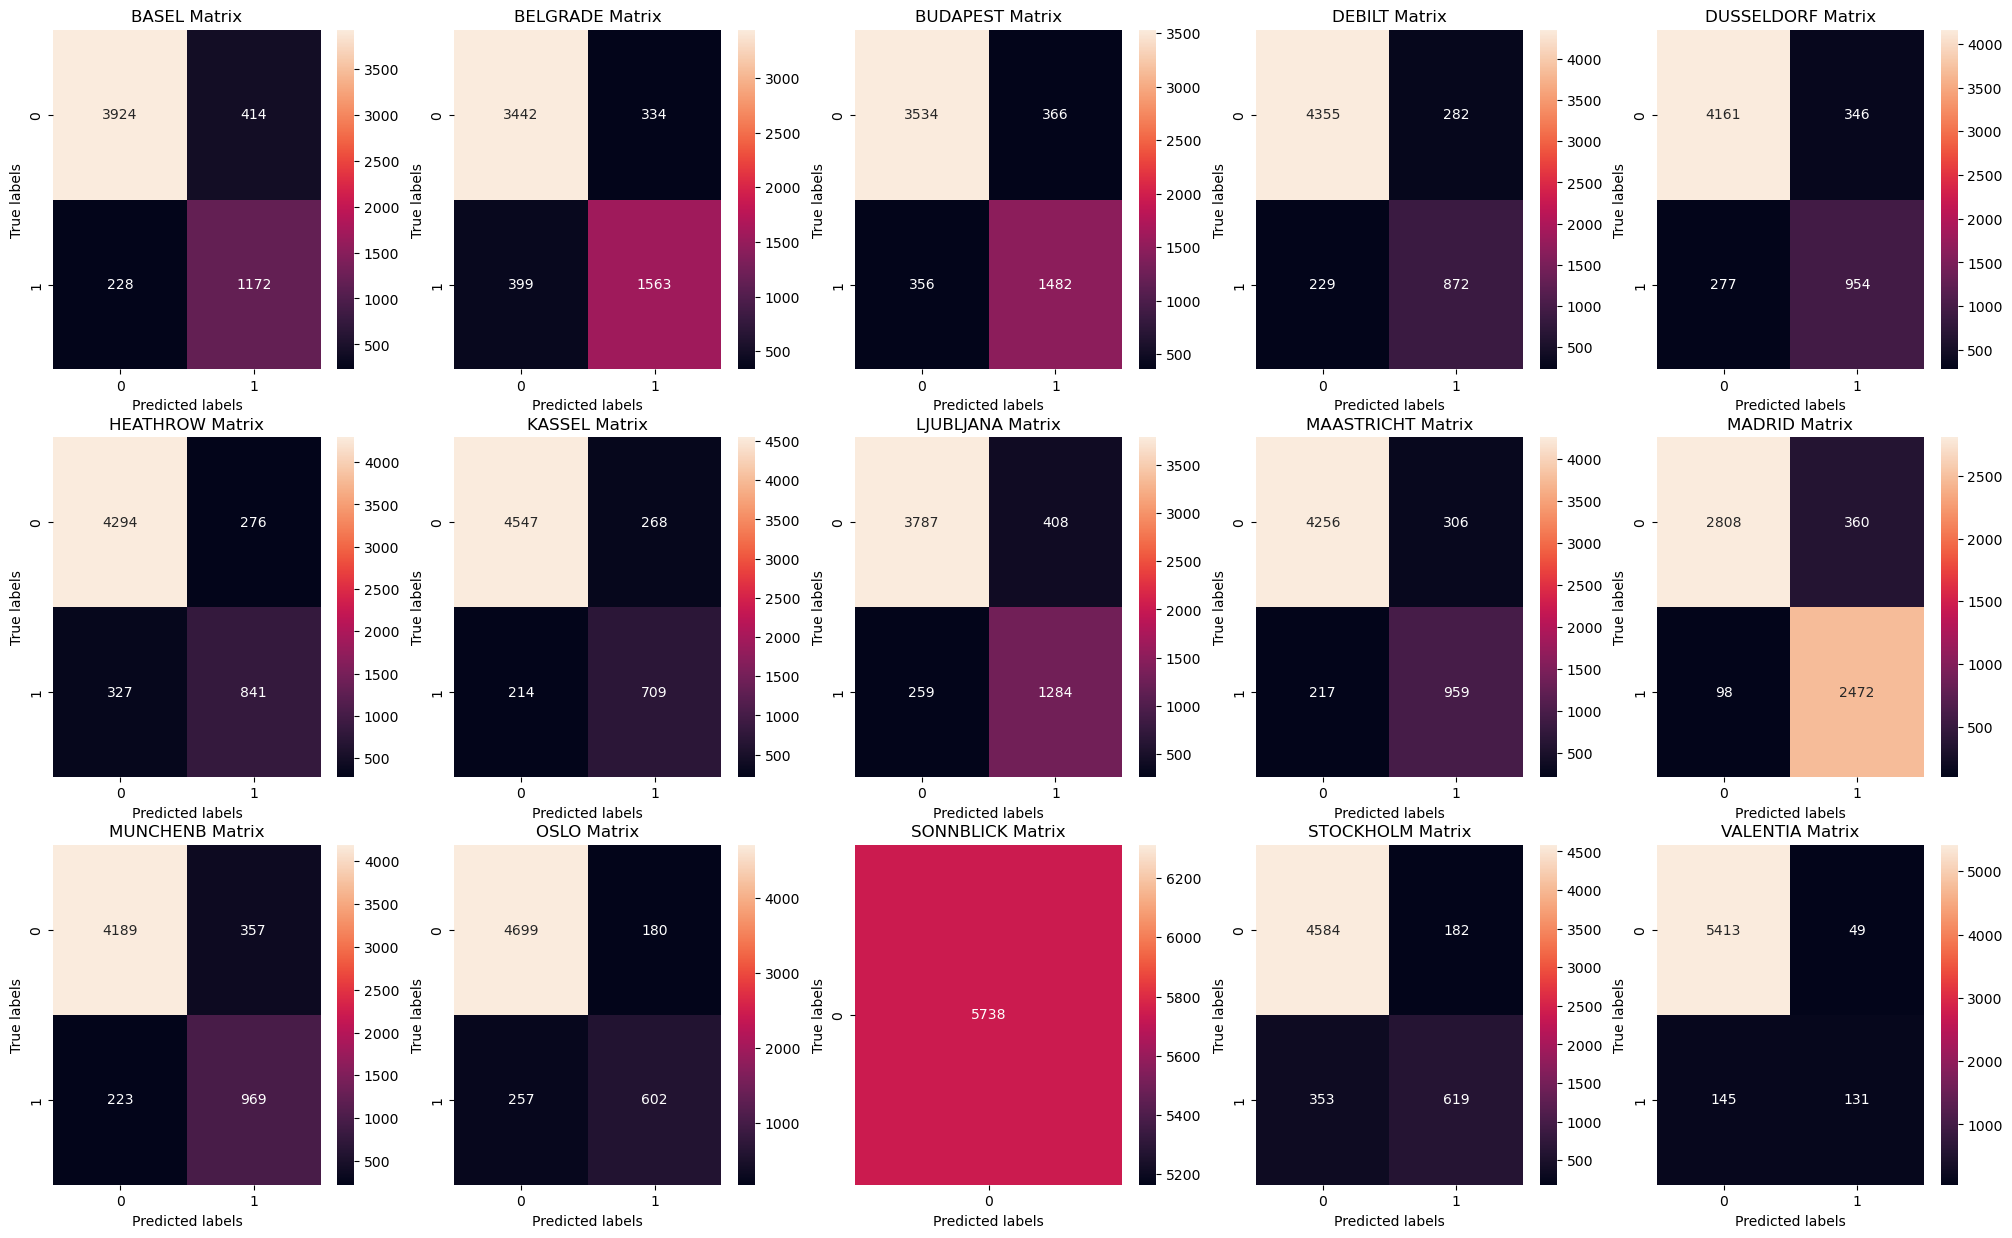

In [27]:
# Confusion Matrix for test data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

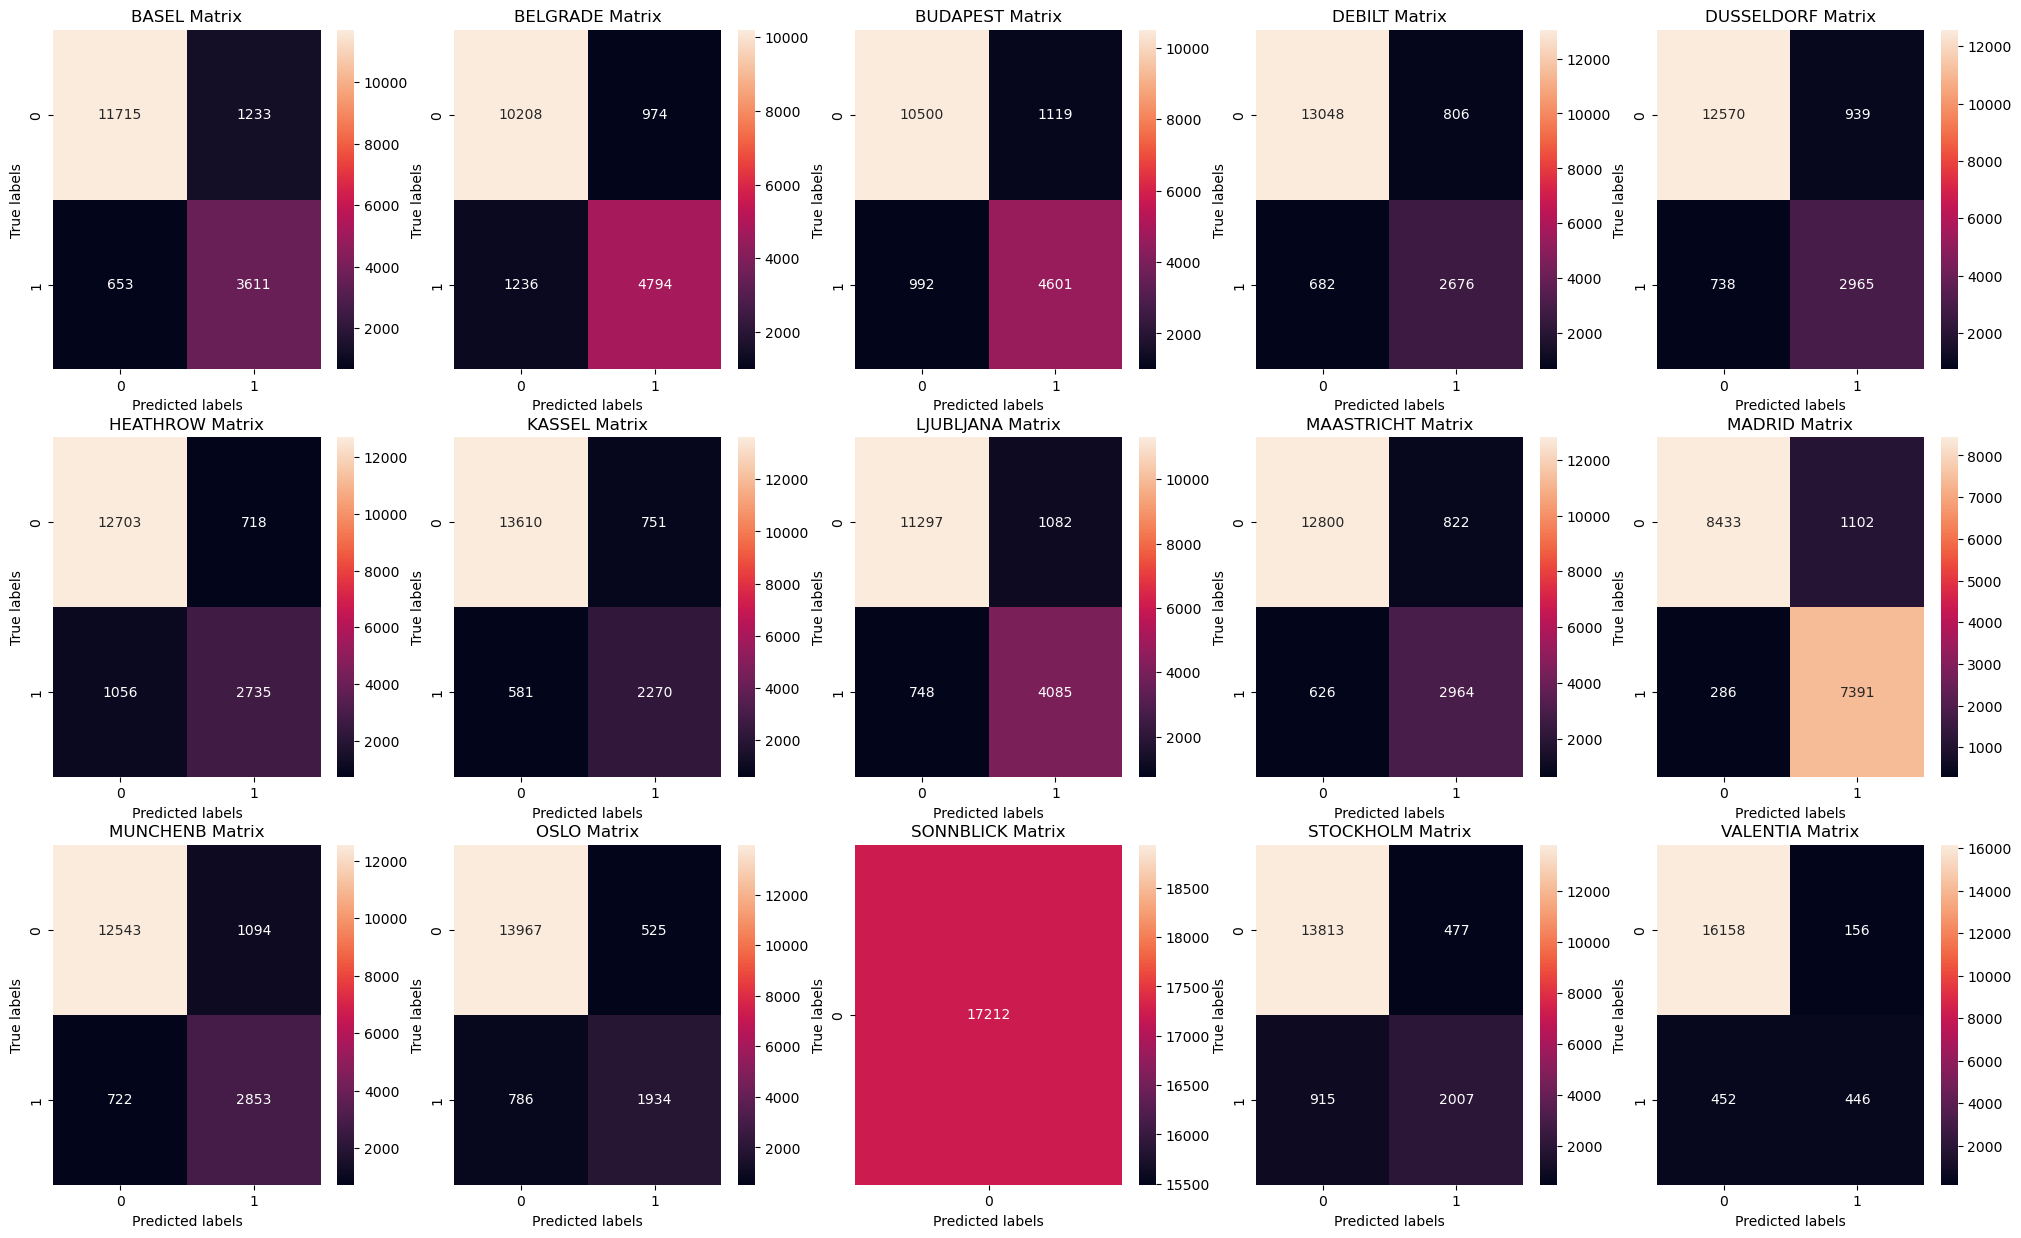

In [29]:
# Confusion Matrix for training data set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## Additional Work - Accuracy Score Recalculations

Calculated Accuracy for BASEL: 0.8904252846851034
Calculated Accuracy for BELGRADE: 0.8716012084592145
Calculated Accuracy for BUDAPEST: 0.8773530095282361
Calculated Accuracy for DEBILT: 0.9135486869625843
Calculated Accuracy for DUSSELDORF: 0.9025679758308157
Calculated Accuracy for HEATHROW: 0.8969323727631885
Calculated Accuracy for KASSEL: 0.9226121310713455
Calculated Accuracy for LJUBLJANA: 0.893678828724146
Calculated Accuracy for MAASTRICHT: 0.9158726469904718
Calculated Accuracy for MADRID: 0.919358587032303
Calculated Accuracy for MUNCHENB: 0.8944922147339066
Calculated Accuracy for OSLO: 0.9238322100859865
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 0.9191261910295143
Calculated Accuracy for VALENTIA: 0.9646758075761097
Average Accuracy across all matrices: 0.9137384770315283


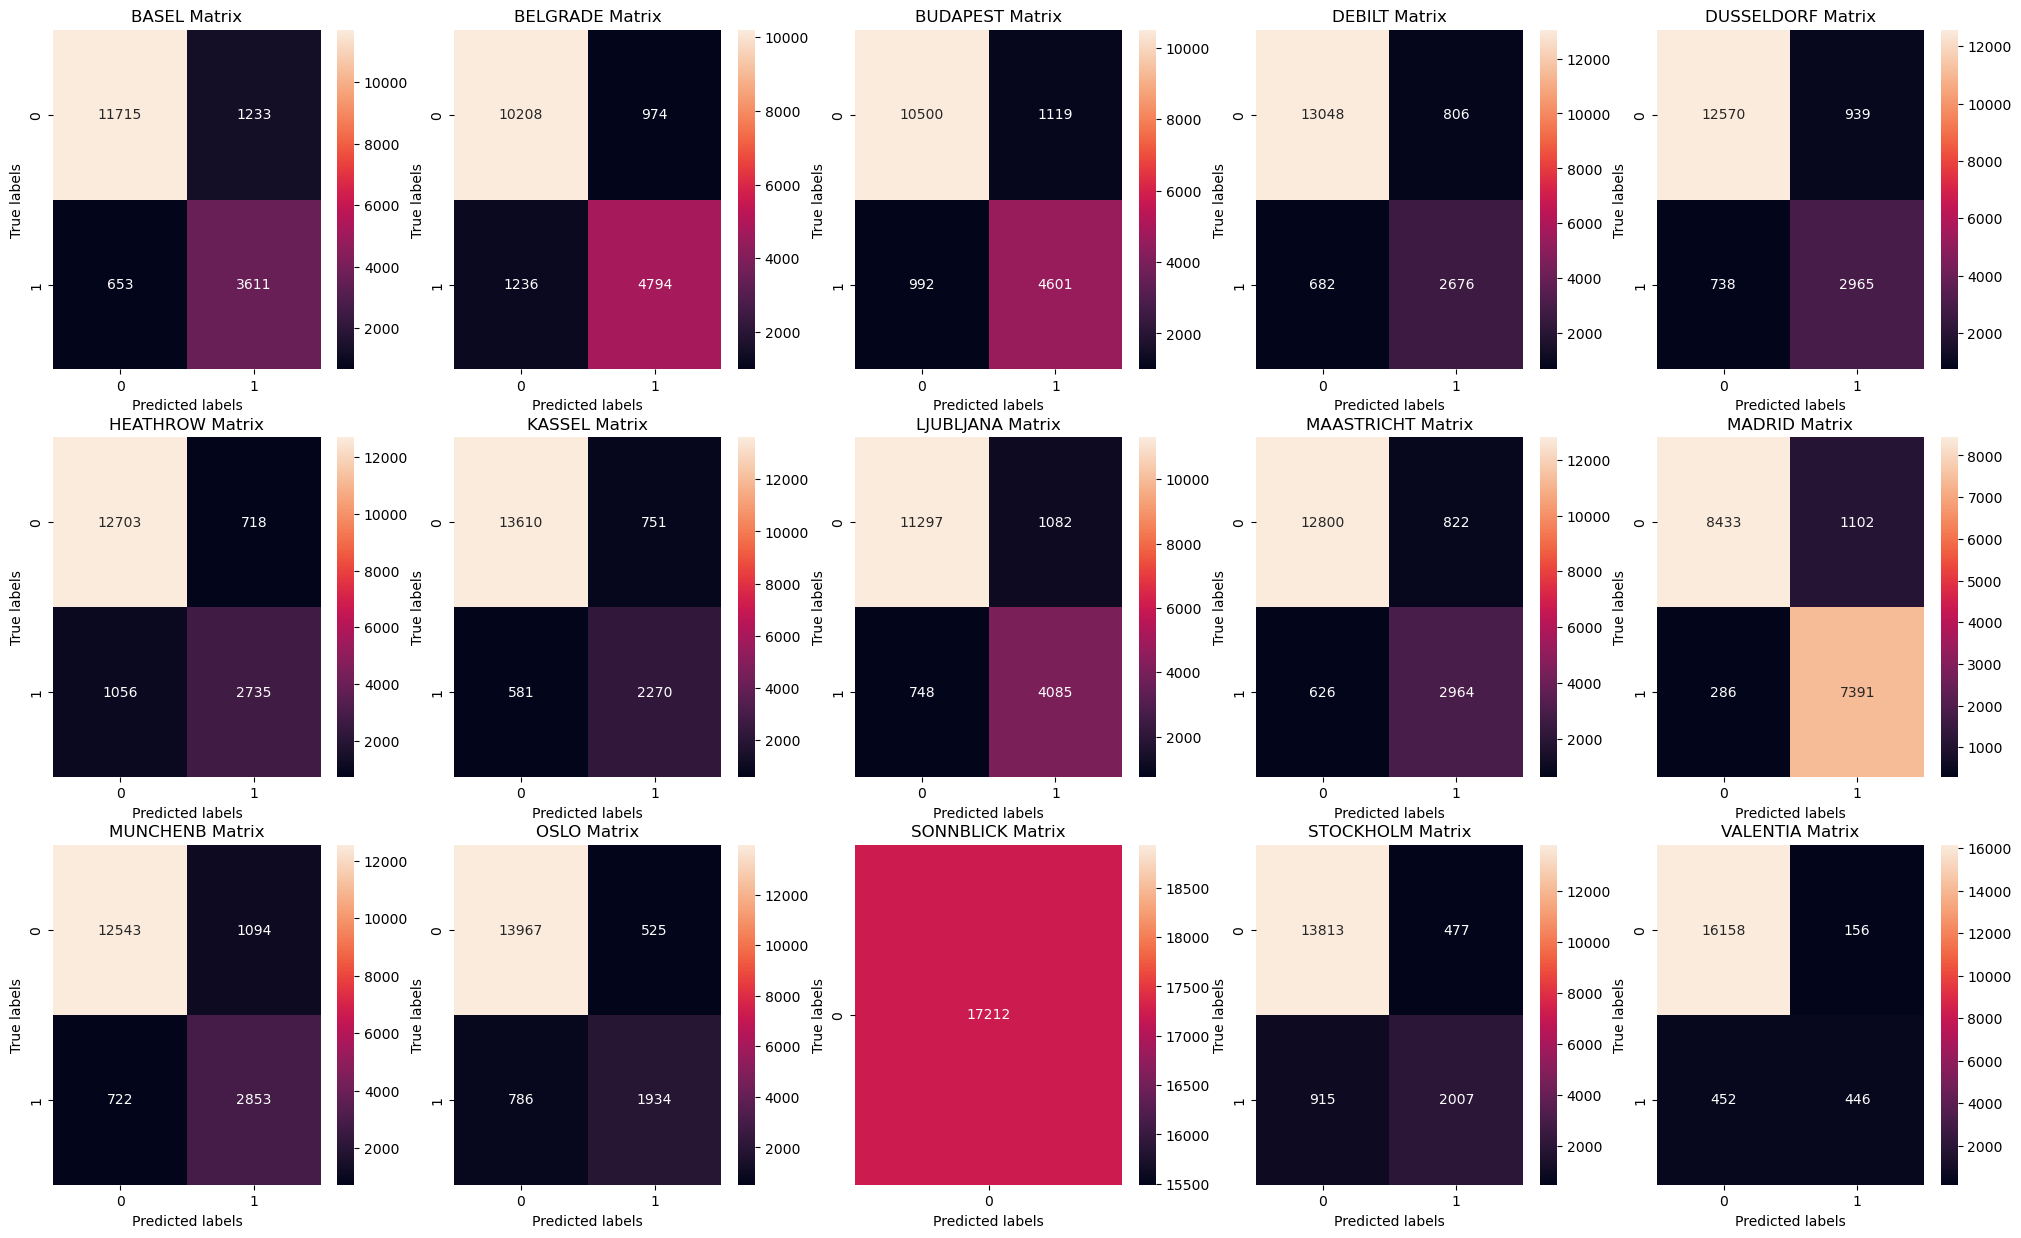

In [30]:
# Confusion Matrix for train data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")

Calculated Accuracy for BASEL: 0.8881143255489717
Calculated Accuracy for BELGRADE: 0.8722551411641687
Calculated Accuracy for BUDAPEST: 0.8741721854304636
Calculated Accuracy for DEBILT: 0.9109445799930289
Calculated Accuracy for DUSSELDORF: 0.8914255838271175
Calculated Accuracy for HEATHROW: 0.8949111188567445
Calculated Accuracy for KASSEL: 0.9159986057859881
Calculated Accuracy for LJUBLJANA: 0.8837574067619379
Calculated Accuracy for MAASTRICHT: 0.9088532589752527
Calculated Accuracy for MADRID: 0.9201812478215406
Calculated Accuracy for MUNCHENB: 0.8989194841408156
Calculated Accuracy for OSLO: 0.9238410596026491
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 0.9067619379574765
Calculated Accuracy for VALENTIA: 0.9661903102126176
Average Accuracy across all matrices: 0.9104217497385849


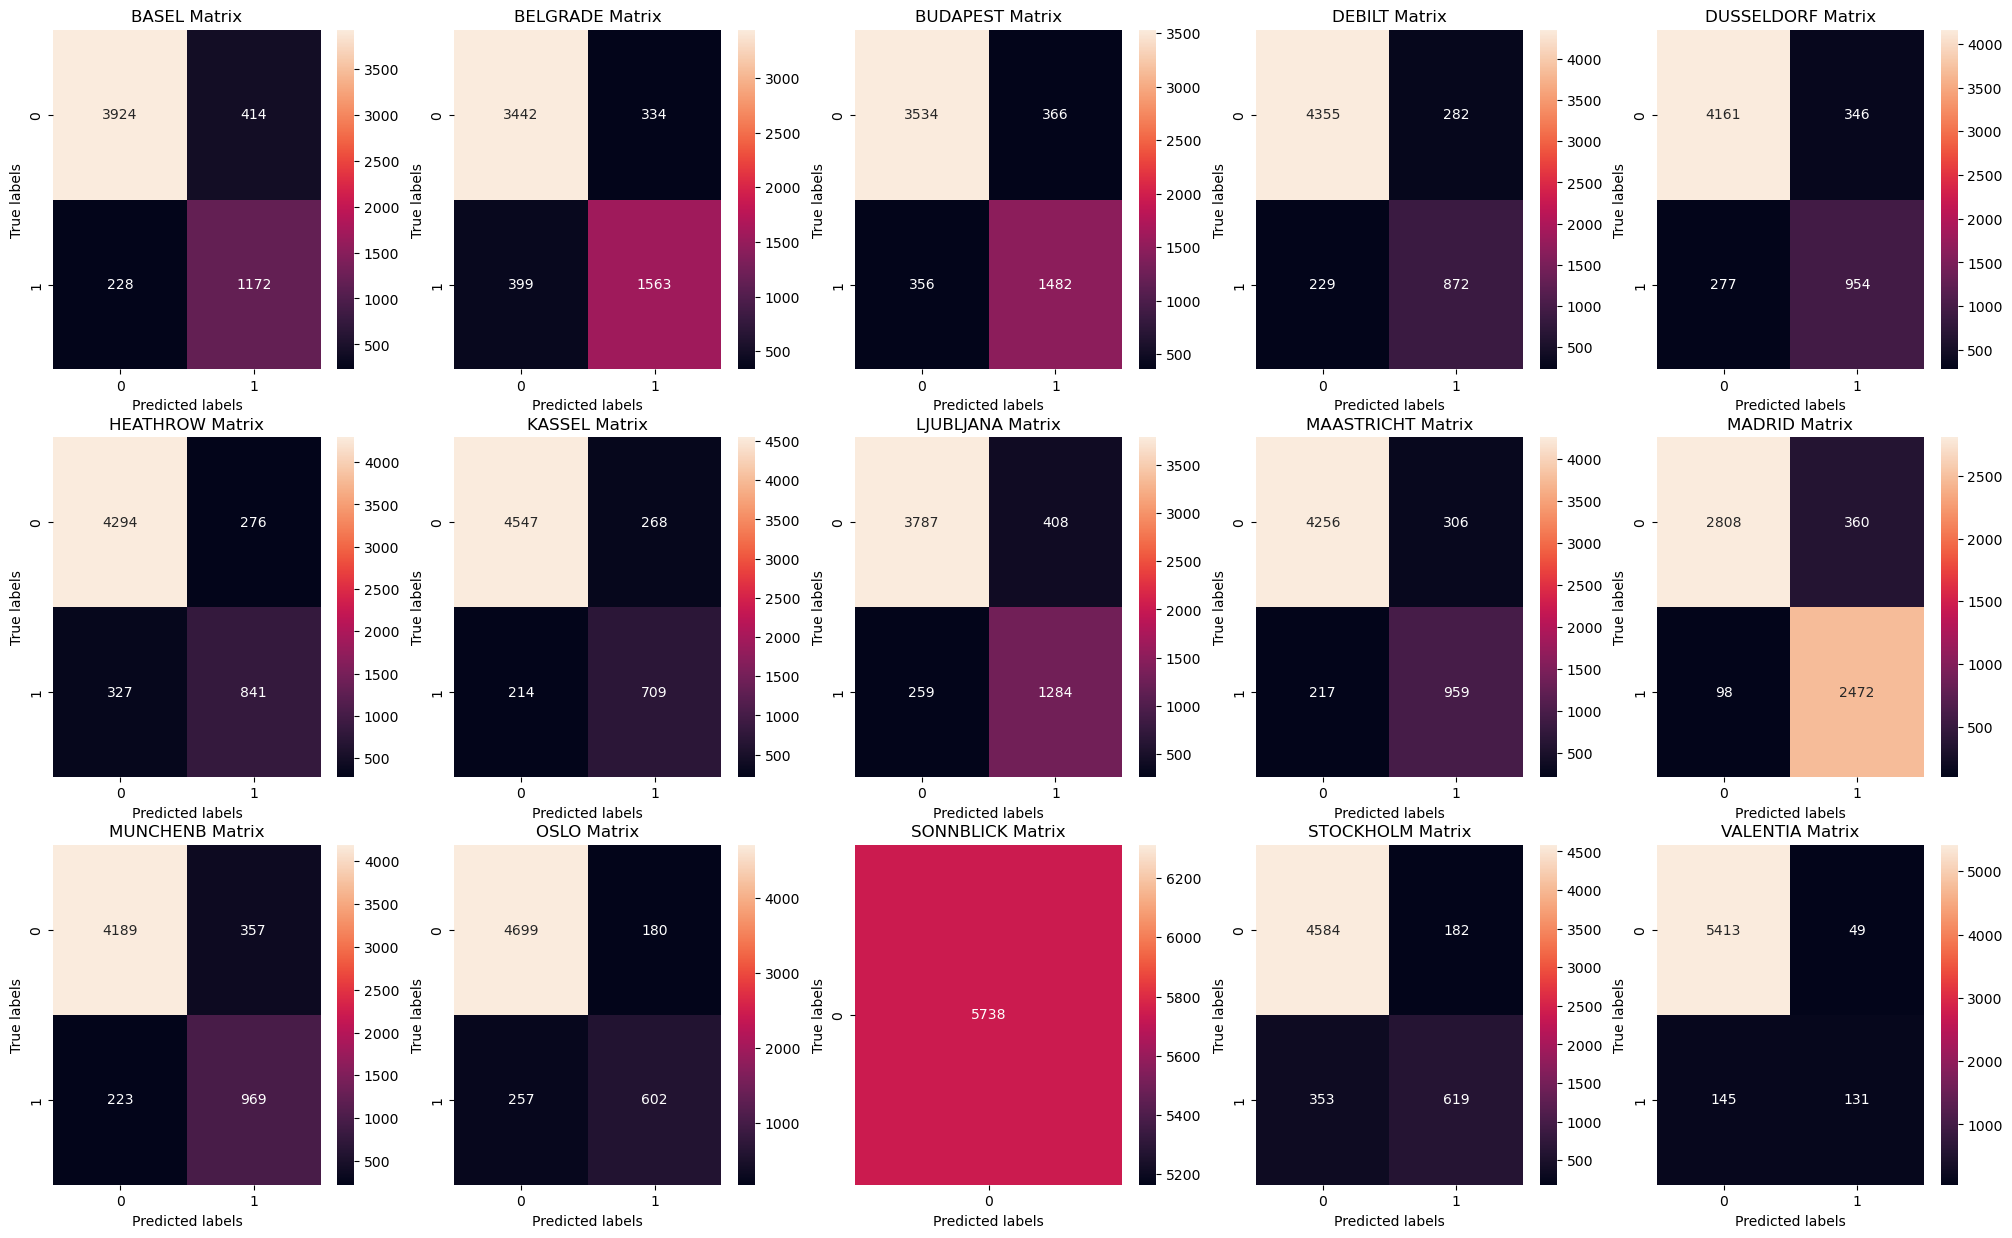

In [31]:
# Confusion Matrix for test data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")

Average accuracy in training data = 91.3%
Average accuracy in testing data = 91.0%

This is the most accurate model used to far. However, ANN models are computationally expensive and their "black-box" nature can be off-putting.